## Les astronomes de Wikipedia: les mots les plus fréquents

La finalité de ce carnet est d'apprendre à explorer le contenu textuel des pages web, une par une et par lots.
Et aussi de pratiquer l'utilisation des listes.


Documentation et tutoriels

* https://www.w3schools.com/html/html_intro.asp
* https://www.w3schools.com/xml/default.asp
* https://www.w3schools.com/xml/xpath_intro.asp


Application (avec des librairies différentes):

* https://programminghistorian.org/fr/lecons/comprendre-les-pages-web
* https://programminghistorian.org/fr/lecons/telecharger-des-pages-web-avec-python

* https://programminghistorian.org/en/lessons/counting-frequencies
* https://programminghistorian.org/en/lessons/from-html-to-list-of-words-1
* https://programminghistorian.org/en/lessons/from-html-to-list-of-words-2

In [1]:
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
import copy

In [2]:
import lxml.html
from lxml import etree
import numpy as np

In [97]:
import os
import re
import string
from collections import Counter
from datetime import datetime

## Récupérer un page web, la transformer en XML puis l'écrire dans un document local

Cf. Python pour les SHS, 3.4.2 et 4.2.4

On veut inspecter le contenu de la page web après l'avoir transformé en HTML (avec structure XML bien formé)

In [6]:
### Récupérer le fichier et le transformer en HTML (structure XML)
url = "https://fr.wikipedia.org/wiki/Johannes_Kepler"
#url = "https://fr.wikipedia.org/wiki/George_Ogden_Abell"

html = requests.get(url)

In [7]:
### Récupérer le contenu avec l'attribut 'content' de la librairie requests
doc_txt = html.content
type(html.content)

bytes

In [8]:
### Écrire le document sur le disque local 
file_name = url.replace('https://fr.wikipedia.org/wiki/','')
file = 'docs_text/' + file_name + '.html'
with open(file, 'wb') as f:
    f.write(doc_txt)

## Inspecter le contenu du document pour identifier le texte utile




In [9]:
### Transformer le document en XML
# On essaye de tirer profit de la librairie requests
doc = lxml.html.fromstring(html.content.decode())
type(doc)

lxml.html.HtmlElement

In [10]:
### Chercher tous les paragraphes
paragraphes = [p for p in doc.xpath('//p')]
paragraphes[:5], len(paragraphes)

([<Element p at 0x7f27ba47c540>,
  <Element p at 0x7f27ba47c5e0>,
  <Element p at 0x7f27ba678b80>,
  <Element p at 0x7f27e41072c0>,
  <Element p at 0x7f27e4107b30>],
 73)

In [11]:
###  Inspecter le contenu des paragraphes en utilisant la méthode getchildren()
# On verrra ainsi quel sont leur éléments-enfants
for p in paragraphes[:5]:
    print(p.getchildren())

[<Element a at 0x7f27ba2b48b0>]
[<Element a at 0x7f27ba2b48b0>]
[<Element span at 0x7f27ba2b48b0>, <Element a at 0x7f27b987b950>]
[<Element b at 0x7f27ba2b48b0>, <Element sup at 0x7f27b987b950>, <Element time at 0x7f27b987bdb0>, <Element a at 0x7f27b987be00>, <Element a at 0x7f27b987b770>, <Element time at 0x7f27b987bc70>, <Element a at 0x7f27b987bd10>, <Element a at 0x7f27b96d8c20>, <Element a at 0x7f27b96d8c70>, <Element a at 0x7f27b96d8cc0>, <Element a at 0x7f27b96d8d10>, <Element a at 0x7f27b96d8d60>, <Element a at 0x7f27b96d8db0>, <Element a at 0x7f27b96d8e00>, <Element a at 0x7f27b96d8e50>, <Element a at 0x7f27b96d8ea0>, <Element a at 0x7f27b96d8ef0>, <Element a at 0x7f27b96d8f40>, <Element a at 0x7f27b96d8f90>, <Element a at 0x7f27b96da040>, <Element a at 0x7f27b96da090>, <Element a at 0x7f27b96da0e0>, <Element sup at 0x7f27b96da130>]
[<Element a at 0x7f27ba2b48b0>, <Element a at 0x7f27b987b950>, <Element a at 0x7f27b987bdb0>, <Element a at 0x7f27b987be00>, <Element a at 0x7f27b

In [12]:
### Inspecter le contenu textuel
[p.text_content()  for p in paragraphes[:5]]

['\n\t\tPages pour les contributeurs déconnectés en savoir plus\n\t',
 '«\xa0Kepler\xa0» redirige ici. Pour les autres significations, voir Kepler (homonymie).\n',
 'modifier ',
 "Johannes Kepler[n 1] (ou Keppler), né le 27 décembre 1571 à Weil (ville libre d'Empire) et mort le 15 novembre 1630 à Ratisbonne (ville libre d'Empire), est un astronome allemand célèbre pour avoir étudié l’hypothèse héliocentrique de Nicolas Copernic, affirmant que la Terre tourne autour du Soleil et surtout pour avoir découvert que les planètes ne tournent pas autour du Soleil en suivant des trajectoires circulaires parfaites mais des trajectoires elliptiques. «\xa0Kepler a découvert les relations mathématiques (dites Lois de Kepler) qui régissent les mouvements des planètes sur leur orbite. Ces relations furent ensuite exploitées par Isaac Newton pour élaborer la théorie de la gravitation universelle.\xa0»[1].\n",
 "Kepler naît au sein d’une famille de religion protestante luthérienne, installée dans la vi

In [13]:
### Chercher tous les paragraphes qui contiennent un élément 'b'
#  <b> : l'élément portant à l'attention
paragraphes = [p for p in doc.xpath('//p[b]')]
paragraphes[:5], len(paragraphes)

([<Element p at 0x7f27e41072c0>, <Element p at 0x7f27b96cf7c0>], 2)

In [14]:
### Chercher tous les paragraphes qui contiennent un élément 'b'
#  ou suivant un élément contenant un élément 'b'.
#  Ceci afin de commencer par le texte de la notice (explorer avec Atom le fichier HTML)

paragraphes = [p for p in doc.xpath("//p[b or preceding::p/b]")]
paragraphes[:5], len(paragraphes)

([<Element p at 0x7f27e41072c0>,
  <Element p at 0x7f27e4107b30>,
  <Element p at 0x7f27b987bdb0>,
  <Element p at 0x7f27b987bcc0>,
  <Element p at 0x7f27b987bc20>],
 70)

In [16]:
### Élimier les notes entre parenthèses
# https://www.codegrepper.com/code-examples/python/regex+remove+text+between+square+brackets+python
[re.sub(r"[\[].*?[\]]", "", p.text_content())  for p in paragraphes[:2]]

["Johannes Kepler (ou Keppler), né le 27 décembre 1571 à Weil (ville libre d'Empire) et mort le 15 novembre 1630 à Ratisbonne (ville libre d'Empire), est un astronome allemand célèbre pour avoir étudié l’hypothèse héliocentrique de Nicolas Copernic, affirmant que la Terre tourne autour du Soleil et surtout pour avoir découvert que les planètes ne tournent pas autour du Soleil en suivant des trajectoires circulaires parfaites mais des trajectoires elliptiques. «\xa0Kepler a découvert les relations mathématiques (dites Lois de Kepler) qui régissent les mouvements des planètes sur leur orbite. Ces relations furent ensuite exploitées par Isaac Newton pour élaborer la théorie de la gravitation universelle.\xa0».\n",
 "Kepler naît au sein d’une famille de religion protestante luthérienne, installée dans la ville de Weil dans le Wurtemberg, ville libre sous l'autorité immédiate de l'Empire. À Weil der Stadt, les Kepler ont joui d'une certaine reconnaissance sociale, son grand-père en a été bo

In [17]:
### Élimiter prépositions tronquées, ponctuation, etc.
[(re.sub(r"[\[].*?[\]]", "", p.text_content())) \
   ### enlever le signe unicode gênant
   .replace(u'\xa0','').replace(u'\xa07','')
   ### enlever les prépositions tronquées
   .replace("l'", '').replace("d'", '').replace("qu'", '') \
   ### enlever la ponctuation
   ### https://www.pythonpool.com/remove-punctuation-python/
   .translate(str.maketrans('', '', string.punctuation)) 
   
 for p in paragraphes[:3]
]

['Johannes Kepler ou Keppler né le 27 décembre 1571 à Weil ville libre Empire et mort le 15 novembre 1630 à Ratisbonne ville libre Empire est un astronome allemand célèbre pour avoir étudié l’hypothèse héliocentrique de Nicolas Copernic affirmant que la Terre tourne autour du Soleil et surtout pour avoir découvert que les planètes ne tournent pas autour du Soleil en suivant des trajectoires circulaires parfaites mais des trajectoires elliptiques «Kepler a découvert les relations mathématiques dites Lois de Kepler qui régissent les mouvements des planètes sur leur orbite Ces relations furent ensuite exploitées par Isaac Newton pour élaborer la théorie de la gravitation universelle»\n',
 'Kepler naît au sein d’une famille de religion protestante luthérienne installée dans la ville de Weil dans le Wurtemberg ville libre sous autorité immédiate de Empire À Weil der Stadt les Kepler ont joui une certaine reconnaissance sociale son grandpère en a été bourgmestre mais après avoir été porté au

In [18]:
### Préparer le texte sous forme de liste de mots

wikitext = []

pp = [(re.sub(r"[\[].*?[\]]", "", p.text_content())) \
   ### enlever le signe unicode gênant
   .replace(u'\xa0','')
   ### enlever les prépositions
   .replace("l'", '').replace("d'", '').replace("qu'", '') \
   .replace("l’", '').replace("d’", '').replace("qu’", '') \
   ### enlever la ponctuation
   ### https://www.pythonpool.com/remove-punctuation-python/
   .translate(str.maketrans('', '', string.punctuation)) 
   
 for p in paragraphes
]    
for p in pp: # [:10]:
    wikitext += p.split()

In [19]:
wikitext[280:300]

['avait',
 'été',
 'élevée',
 'par',
 'une',
 'tante',
 'qui',
 'finit',
 'sur',
 'le',
 'bûcher',
 'pour',
 'sorcellerie',
 'Kepler',
 'a',
 'trois',
 'cadets',
 'sa',
 'sœur',
 'Margarette']

In [21]:
### Liste de mots à omettre — cette liste peut être enrichie progressivement
stopw_file= 'donnees/stopwords_francais.txt'
with open(stopw_file, 'r') as f:
    stopw = f.read()
stopw_l = stopw.split('; ')
stopw_l[:3]    

['alors', 'ainsi', 'au']

In [22]:
### Les mots retenus
wt = ' '.join([t for t in wikitext if (len(t.strip())) > 4 and t not in stopw_l ])
len(wt)

17825

In [23]:
wt[:1000]

'Johannes Kepler Keppler décembre ville libre Empire novembre Ratisbonne ville libre Empire astronome allemand célèbre étudié hypothèse héliocentrique Nicolas Copernic affirmant Terre tourne Soleil surtout découvert planètes tournent Soleil suivant trajectoires circulaires parfaites trajectoires elliptiques «Kepler découvert relations mathématiques dites Kepler régissent mouvements planètes orbite relations furent ensuite exploitées Isaac Newton élaborer théorie gravitation universelle» Kepler famille religion protestante luthérienne installée ville Wurtemberg ville libre autorité immédiate Empire Stadt Kepler certaine reconnaissance sociale grandpère bourgmestre porté combattu ordres CharlesQuint sombré pauvreté Toute famille sentasse maison grandsparents Sebald Kepler Katharina Müller prématurément hypocondriaque nature chétive Johannes Kepler souffre santé fragile trois contracte variole séquelles affaiblit sévèrement famille Kepler ordinaire ambiance n’est saines Heinrich Kepler me

In [26]:
### Les mots identifiant l'astronome en question, également à éliminer
file_name.split('_')

['Johannes', 'Kepler']

In [27]:
### Afficher les fréquences de mots sous forme graphique
stopw_suppl = file_name.split('_')
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopw_suppl).generate(wt) 

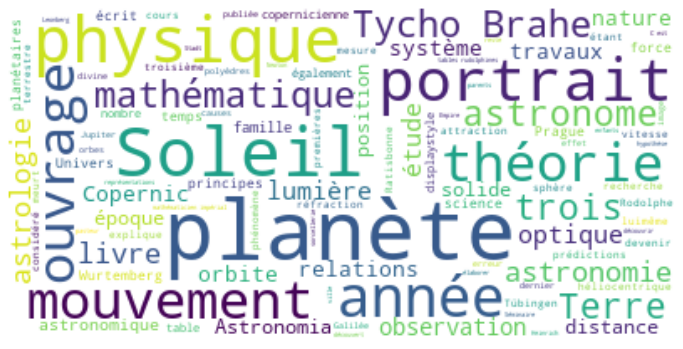

In [28]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
### Lister la fréquence des mots
freq_words = WordCloud( stopwords=stopw_suppl).process_text(wt)

In [30]:
fw_list = sorted(freq_words.items(), key=lambda x:x[1], reverse=True)
fw_list[:100]

[('planète', 22),
 ('Soleil', 14),
 ('physique', 12),
 ('portrait', 11),
 ('année', 10),
 ('théorie', 9),
 ('mouvement', 9),
 ('ouvrage', 9),
 ('mathématique', 9),
 ('Tycho Brahe', 9),
 ('astronome', 8),
 ('Terre', 8),
 ('trois', 8),
 ('astronomie', 8),
 ('livre', 8),
 ('astrologie', 8),
 ('optique', 7),
 ('lumière', 7),
 ('étude', 7),
 ('observation', 7),
 ('Copernic', 6),
 ('relations', 6),
 ('orbite', 6),
 ('nature', 6),
 ('travaux', 6),
 ('système', 6),
 ('époque', 6),
 ('Astronomia', 6),
 ('position', 6),
 ('distance', 6),
 ('solide', 6),
 ('astronomique', 6),
 ('famille', 5),
 ('Wurtemberg', 5),
 ('force', 5),
 ('temps', 5),
 ('science', 5),
 ('Prague', 5),
 ('planétaires', 5),
 ('écrit', 5),
 ('principes', 5),
 ('Univers', 5),
 ('copernicienne', 5),
 ('nombre', 5),
 ('également', 5),
 ('displaystyle', 5),
 ('table', 5),
 ('Ratisbonne', 4),
 ('héliocentrique', 4),
 ('étant', 4),
 ('luimême', 4),
 ('recherche', 4),
 ('cours', 4),
 ('phénomène', 4),
 ('Tübingen', 4),
 ('devenir', 4

In [32]:
### Pour les textes courts cette fréquence ne convient pas
lm = [m for m in fw_list if m[1] > 4]
len(lm), lm[:5]

(47,
 [('planète', 22),
  ('Soleil', 14),
  ('physique', 12),
  ('portrait', 11),
  ('année', 10)])

In [33]:
sort_fwl = dict([m for m in fw_list if m[1] > 4])
print(len(sort_fwl),sort_fwl)

47 {'planète': 22, 'Soleil': 14, 'physique': 12, 'portrait': 11, 'année': 10, 'théorie': 9, 'mouvement': 9, 'ouvrage': 9, 'mathématique': 9, 'Tycho Brahe': 9, 'astronome': 8, 'Terre': 8, 'trois': 8, 'astronomie': 8, 'livre': 8, 'astrologie': 8, 'optique': 7, 'lumière': 7, 'étude': 7, 'observation': 7, 'Copernic': 6, 'relations': 6, 'orbite': 6, 'nature': 6, 'travaux': 6, 'système': 6, 'époque': 6, 'Astronomia': 6, 'position': 6, 'distance': 6, 'solide': 6, 'astronomique': 6, 'famille': 5, 'Wurtemberg': 5, 'force': 5, 'temps': 5, 'science': 5, 'Prague': 5, 'planétaires': 5, 'écrit': 5, 'principes': 5, 'Univers': 5, 'copernicienne': 5, 'nombre': 5, 'également': 5, 'displaystyle': 5, 'table': 5}


In [36]:
### Conlcusion : les vingt premiers mots si au moins deux mentions
# Mais une fois récupés les textes j'ai observé qu'il y en a de vraiment courts. 
# Donc sont retenus les 20 premiers mots sans restriction 
result = [m for m in fw_list if m[1] > 1][:20]
len(result), result[:5]

(20,
 [('planète', 22),
  ('Soleil', 14),
  ('physique', 12),
  ('portrait', 11),
  ('année', 10)])

## Collecter le corpus des 20 mots les plus fréquents des listes des astronomes

In [37]:
### Récupérer la liste des astronomes
html_l = requests.get("https://fr.wikipedia.org/wiki/Liste_d'astronomes")
doc_l = lxml.html.fromstring(html_l.content)

In [44]:
### Récupérer le contenu avec l'attribut 'content' de la librairie requests
doc_txt = html_l.content
type(doc_txt)

bytes

In [47]:
### Écrire le document avec la liste des astronomes sur le disque local 
file = 'docs_text/liste_astronomes.html'
with open(file, 'wb') as f:
    f.write(doc_txt)

In [48]:
### Limiter la liste aux éléments utiles (entre Liste alphabétique et Références)
# Ces choix sont effectués après exploration du fichier HTML
li_list = doc_l.xpath("//li[contains(./a[1]/@href, '/wiki/')][preceding::span/@id='Liste_alphabétique'][following::span/@id='Références']")
len(li_list), li_list[:3]

(729,
 [<Element li at 0x7f27b931d130>,
  <Element li at 0x7f27b9326860>,
  <Element li at 0x7f27b9326900>])

In [49]:
### Récupérer la valeur de l'attribut 'title'
li_list[1].findall("a")[0].attrib['title']

'Marc Aaronson'

In [50]:
### Récupérer l'année de naissance
print(li_list[1].text_content())
re.findall(r"\D(\d{4})\D", li_list[1].text_content())[0]

Marc Aaronson (ÉU, 1950 — 1987)


'1950'

In [51]:
### Préparer la liste des astronomes à étudier
tt = []
for c in li_list:
    if len(re.findall(r"\D(\d{4})\D", c.text_content())) > 0:
        date = int(re.findall(r"\D(\d{4})\D", c.text_content())[0])
    else:
        date = 0
    tt.append([c.findall("a")[0].attrib['title'], \
       c.findall("a")[0].attrib['href'].replace('/wiki', 'https://fr.wikipedia.org/wiki'), \
       date])
tt[:7]

[['Âryabhata', 'https://fr.wikipedia.org/wiki/%C3%82ryabhata', 0],
 ['Marc Aaronson', 'https://fr.wikipedia.org/wiki/Marc_Aaronson', 1950],
 ['George Ogden Abell',
  'https://fr.wikipedia.org/wiki/George_Ogden_Abell',
  1927],
 ['Hiroshi Abe (astronome)',
  'https://fr.wikipedia.org/wiki/Hiroshi_Abe_(astronome)',
  1958],
 ['Antonio Abetti', 'https://fr.wikipedia.org/wiki/Antonio_Abetti', 1846],
 ['Giorgio Abetti', 'https://fr.wikipedia.org/wiki/Giorgio_Abetti', 1882],
 ['Charles Greeley Abbot',
  'https://fr.wikipedia.org/wiki/Charles_Greeley_Abbot',
  1872]]

In [53]:
### Effectif total et effectif avec année de naissance
len(tt), len([t for t in tt if t[2] != 0])

(729, 629)

In [57]:
# Distribution par année de naissance
eff_annees = list(Counter(sorted([t[2] for t in tt])).items())
min(eff_annees), eff_annees[1], max(eff_annees), eff_annees[70:80]

((0, 100),
 (1005, 1),
 (1979, 1),
 [(1730, 2),
  (1731, 1),
  (1732, 3),
  (1734, 2),
  (1735, 1),
  (1736, 2),
  (1738, 1),
  (1744, 2),
  (1745, 1),
  (1746, 1)])

In [58]:
l_50 = list(np.arange(1001, 2001, 50))
l_50[:5]

[1001, 1051, 1101, 1151, 1201]

In [60]:
tt[5:10]

[['Giorgio Abetti', 'https://fr.wikipedia.org/wiki/Giorgio_Abetti', 1882],
 ['Charles Greeley Abbot',
  'https://fr.wikipedia.org/wiki/Charles_Greeley_Abbot',
  1872],
 ['Charles Hitchcock Adams',
  'https://fr.wikipedia.org/wiki/Charles_Hitchcock_Adams',
  1868],
 ['John Couch Adams', 'https://fr.wikipedia.org/wiki/John_Couch_Adams', 1819],
 ['Walter Sydney Adams',
  'https://fr.wikipedia.org/wiki/Walter_Sydney_Adams',
  1876]]

In [61]:
new_tt = copy.deepcopy([t for t in tt if t[2] != 0])
new_tt[5:10]

[['Charles Greeley Abbot',
  'https://fr.wikipedia.org/wiki/Charles_Greeley_Abbot',
  1872],
 ['Charles Hitchcock Adams',
  'https://fr.wikipedia.org/wiki/Charles_Hitchcock_Adams',
  1868],
 ['John Couch Adams', 'https://fr.wikipedia.org/wiki/John_Couch_Adams', 1819],
 ['Walter Sydney Adams',
  'https://fr.wikipedia.org/wiki/Walter_Sydney_Adams',
  1876],
 ['Pierre Alphonse', 'https://fr.wikipedia.org/wiki/Pierre_Alphonse', 1062]]

In [62]:
### Ajouter périodes de 50 ans: quinquagennal
for t in new_tt:    
    for a in l_50:
        if t[2] >= a and t[2] < a + 50:
            t.append(a)
new_tt[5:10]

[['Charles Greeley Abbot',
  'https://fr.wikipedia.org/wiki/Charles_Greeley_Abbot',
  1872,
  1851],
 ['Charles Hitchcock Adams',
  'https://fr.wikipedia.org/wiki/Charles_Hitchcock_Adams',
  1868,
  1851],
 ['John Couch Adams',
  'https://fr.wikipedia.org/wiki/John_Couch_Adams',
  1819,
  1801],
 ['Walter Sydney Adams',
  'https://fr.wikipedia.org/wiki/Walter_Sydney_Adams',
  1876,
  1851],
 ['Pierre Alphonse',
  'https://fr.wikipedia.org/wiki/Pierre_Alphonse',
  1062,
  1051]]

### Grouper par périodes de 50 ans

In [63]:
### Grouper par quinquagennals et compter
eff_quinquagennals = list(Counter(sorted([t[3] for t in new_tt])).items())
eff_quinquagennals[:5]

[(1001, 6), (1051, 2), (1101, 2), (1201, 3), (1351, 2)]

In [64]:
ordonnees = [e[1] for e in eff_quinquagennals]
len(l_50), len(ordonnees)

(20, 17)

### Manquent certaines valeurs car effectif absent
eff_quinquagennals[:7]

In [72]:
### Corriger afin de disposer de toutes les valeurs
new_eff_quinquagennals = []
for a in l_50:
    r = 0
    for e in eff_quinquagennals:
        if a == e[0]:
            new_eff_quinquagennals.append(e)
            r = e[1]
    if r == 0:
        new_eff_quinquagennals.append((a,0))
new_eff_quinquagennals[:7]

[(1001, 6), (1051, 2), (1101, 2), (1151, 0), (1201, 3), (1251, 0), (1301, 0)]

In [73]:
### Préparer les données pour le graphiques
ordonnees = [e[1] for e in new_eff_quinquagennals]
len(l_50), len(ordonnees)

(20, 20)

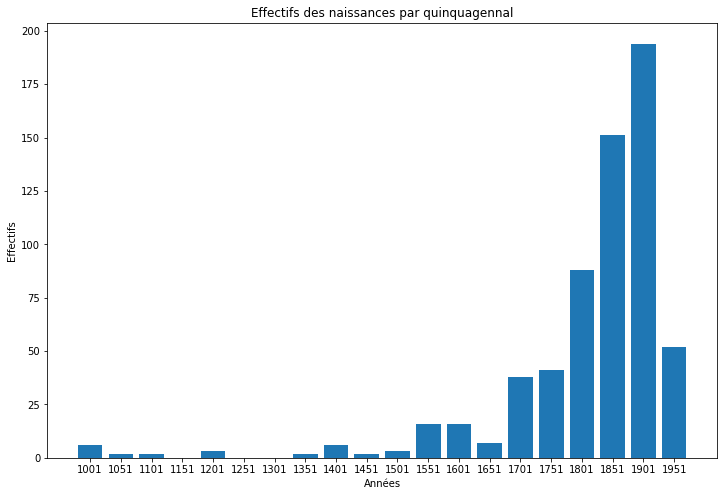

In [74]:
### Documentation:
#  https://pythonguides.com/stacked-bar-chart-matplotlib/
#  https://stackoverflow.com/questions/16653815/horizontal-stacked-bar-chart-in-matplotlib
#  https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib

fig = plt.figure(figsize=(12,8))

abscisses = [str(a) for a in l_50]

# Plot bar chart
plt.bar(abscisses, ordonnees)

# Add labels

plt.xlabel("Années")
plt.ylabel("Effectifs")
plt.title('Effectifs des naissances par quinquagennal')


# Display
plt.show()

In [75]:
new_tt[1:2]

[['George Ogden Abell',
  'https://fr.wikipedia.org/wiki/George_Ogden_Abell',
  1927,
  1901]]

In [76]:
new_tt_text = [t for t in new_tt]

In [77]:
id(new_tt_text), id(new_tt)

(139808590165376, 139808053976704)

In [78]:
###  https://www.programiz.com/python-programming/shallow-deep-copy
# une vraie copie est nécessaire pour éviter que la liste précédente 
#  soit aussi mise à jour
new_tt_text = copy.deepcopy(new_tt)

In [79]:
id(new_tt_text), id(new_tt)

(139808053789568, 139808053976704)

In [99]:
new_tt_text = copy.deepcopy(new_tt)
wt_text=[]
    
### Attention: commenter la limite à 5 lignes pour récupérer tous les fichiers
for l in new_tt_text:  #[:5]:  # :
    try:
        html = requests.get(l[1])
        doc = lxml.html.fromstring(html.content.decode())
        paragraphes = [p for p in doc.xpath("//p[b or preceding::p/b]")]
        wikitext = []
        pp = [(re.sub(r"[\[].*?[\]]", "", p.text_content())) \
           ### enlever le signe unicode gênant
           .replace(u'\xa0','')
           ### enlever les prépositions
           .replace("l'", '').replace("d'", '').replace("qu'", '') \
           .replace("l’", '').replace("d’", '').replace("qu’", '') \
           ### enlever la ponctuation
           ### https://www.pythonpool.com/remove-punctuation-python/
           .translate(str.maketrans('', '', string.punctuation)) 

         for p in paragraphes
        ]    
        for p in pp:
            wikitext += p.split()

        ### Les mots retenus
        wt = ' '.join([t for t in wikitext if (len(t.strip())) > 4 and t not in stopw_l ])
        l.append(len(wt))

        stopw_suppl = l[0].split()

        ### Lister la fréquence des mots
        freq_words = WordCloud( stopwords=stopw_suppl).process_text(wt)
        fw_list = sorted(freq_words.items(), key=lambda x:x[1], reverse=True)

        ### Conlcusion : les vingt premiers mots 
        result = fw_list[:20]


        l.append(len(result))
        l.append(result)



        wt_text.append(l)
       # print(l)
    except Exception as e:
        print(l, e)

In [100]:
len(wt_text), wt_text[:1]

(629,
 [['Marc Aaronson',
   'https://fr.wikipedia.org/wiki/Marc_Aaronson',
   1950,
   1901,
   863,
   20,
   [('référence', 3),
    ('articles', 2),
    ('sources', 2),
    ('avril', 2),
    ('Arizona', 2),
    ('ensuite', 2),
    ('galaxies', 2),
    ('astronomie', 2),
    ('étude', 2),
    ('étoiles', 2),
    ('disposez', 1),
    ('ouvrages', 1),
    ('connaissez', 1),
    ('sites', 1),
    ('qualité', 1),
    ('traitant', 1),
    ('thème', 1),
    ('abordé', 1),
    ('merci', 1),
    ('compléter', 1)]]])

In [96]:
### Comme la requête prend du temps, on écrit le fichier pour en disposer pour l'analyse

colonnes = ['name','url','date', 'quinquennial', 'tot_words', 'len_words', 'words']

dt_obj = datetime.now().strftime("%Y%m%d_%H%M%S")


file_name = 'docs_text/20_most_used_words_{}.csv'.format(dt_obj)

with open(file_name, 'w') as f:
                
    fw = csv.writer(f, delimiter='\t')

    fw.writerow(colonnes)
    for l in wt_text:
        fw.writerow(l)
        wt_text

In [105]:
### Vérifier les effectifs par mots retenus
eff_mots_retenus = list(Counter(sorted([t[5] for t in wt_text])).items())
eff_mots_retenus[:10]

[(0, 1),
 (8, 1),
 (9, 1),
 (11, 3),
 (16, 7),
 (17, 1),
 (18, 5),
 (19, 6),
 (20, 604)]